In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

%matplotlib inline



In [ ]:
train_data=pd.read_csv('train (2).csv', sep=',')
test_data=pd.read_csv('test (2).csv', sep=',')


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


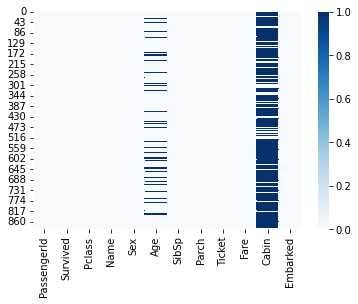

In [ ]:
sns.heatmap(train_data.isnull(), cmap='Blues')

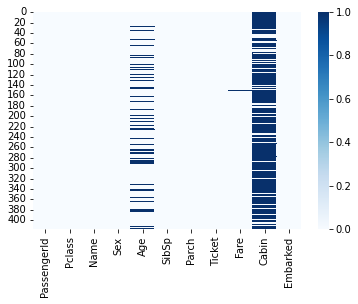

In [ ]:
sns.heatmap(test_data.isnull(), cmap='Blues')

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
X=train_data.drop(columns=['Name', 'PassengerId','Cabin', 'Ticket','Survived'], axis=1)
y=train_data['Survived']
X_test=test_data.drop(columns=['Name', 'PassengerId','Cabin', 'Ticket'], axis=1)

In [ ]:
X.shape

(891, 7)

In [ ]:
y.shape

(891,)

In [ ]:
X['family']=X['SibSp']+X['Parch']+1
X_test['family']=X_test['SibSp']+X_test['Parch']+1

In [ ]:
X=X.drop(columns=['SibSp', 'Parch'], axis=1)
X_test=X_test.drop(columns=['SibSp', 'Parch'], axis=1)

In [ ]:
X=pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked','family'], drop_first=True)
X_test=pd.get_dummies(X_test, columns=['Pclass', 'Sex', 'Embarked','family'], drop_first=True)

In [ ]:
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
X_train=pd.DataFrame(imp.fit_transform(X), columns=X.columns)
X_test=pd.DataFrame(imp.fit_transform(X_test), columns=X_test.columns)

In [ ]:
minmax=MinMaxScaler()

In [ ]:
X_train[['Fare']]=minmax.fit_transform(X_train[['Fare']])
X_test[['Fare']]=minmax.fit_transform(X_test[['Fare']])

In [ ]:
X_train, X_val, y_train, y_val=train_test_split(X_train, y, test_size=0.2, stratify=y)

In [ ]:
rf=RandomForestClassifier(random_state=42)

In [ ]:
param = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [5, 10, 15]
     }

In [ ]:
rfc=GridSearchCV(estimator=rf, param_grid=param, cv=9)
rfc.fit(X_train, y_train)

GridSearchCV(cv=9, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [ ]:
print(rfc.best_score_)

0.8201476793248944


In [ ]:
rfg=rfc.best_estimator_
print(roc_auc_score(rfg.predict(X_val), y_val))


0.8653089036947303


In [ ]:
preds=rfg.predict(X_test)

In [ ]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
test_data['Survived']=preds

In [ ]:
res = pd.DataFrame(test_data, columns=['PassengerId', 'Survived']) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
#res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ['PassengerId','Survived']

# To download the csv file locally
from google.colab import files
res.to_csv('titanic.csv')         
#files.download('titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>